In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [74]:
N = 40; n = np.arange(1,N+1); M = 2*N + 1
L = 2*np.pi

Delta = L/(M+1)
collocation_points = np.linspace(-L/2, L/2-Delta, M)
print(len(collocation_points))
print(M)
epsilon = 0.1; D = 0.6; alpha = 0.95; 
print(n)
Lambda = 15
K = 1/3*(1-alpha)**3*L
a1= 0
print(A)
print(collocation_points)

81
81
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
0.0005499406005614062
[-3.14159265 -3.06401064 -2.98642863 -2.90884661 -2.8312646  -2.75368259
 -2.67610057 -2.59851856 -2.52093654 -2.44335453 -2.36577252 -2.2881905
 -2.21060849 -2.13302648 -2.05544446 -1.97786245 -1.90028043 -1.82269842
 -1.74511641 -1.66753439 -1.58995238 -1.51237037 -1.43478835 -1.35720634
 -1.27962432 -1.20204231 -1.1244603  -1.04687828 -0.96929627 -0.89171426
 -0.81413224 -0.73655023 -0.65896822 -0.5813862  -0.50380419 -0.42622217
 -0.34864016 -0.27105815 -0.19347613 -0.11589412 -0.03831211  0.03926991
  0.11685192  0.19443394  0.27201595  0.34959796  0.42717998  0.50476199
  0.582344    0.65992602  0.73750803  0.81509005  0.89267206  0.97025407
  1.04783609  1.1254181   1.20300011  1.28058213  1.35816414  1.43574615
  1.51332817  1.59091018  1.6684922   1.74607421  1.82365622  1.90123824
  1.97882025  2.05640226  2.13398428  2.2115662

In [75]:
def f_solitary_wave(vec):
    M = len(vec); N = int((M-1)/2)
    a = np.zeros(N)
    a[0] = a1
    
    #print(vec)
    a[1:] = vec[:N-1]; b = vec[N-1:(2*N-1)]; c = vec[M-2]; A = vec[-1]

    eta = np.zeros_like(collocation_points); eta_z = np.zeros_like(collocation_points)
    eta_zz = np.zeros_like(collocation_points); eta_zzz = np.zeros_like(collocation_points)
    
    for j,n_value in enumerate(n):
        eta += a[j]*np.cos(2*n_value*np.pi/L*collocation_points) + b[j]*np.sin(2*n_value*np.pi/L*collocation_points) + A
        #eta_z
        eta_z += -a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        eta_z += b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        #eta_zz
        eta_zz += -a[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        eta_zz += -b[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        #eta_zzz
        eta_zzz += a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
        eta_zzz += -b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
    
    #plt.plot(collocation_points, eta)
    equations = np.zeros_like(vec)
    equations = -c*eta + 1/3*(1+D*eta_z+epsilon**2*eta_zzz)*eta**3-K
    #print((equations**2).mean())
    return equations

In [76]:
vec_guess = np.concatenate([np.random.random(N-1)*0.01, 0.01*np.random.random(N), np.array([0.01,0.75])])

In [77]:
#vec_sol = scipy.optimize.fsolve(f_solitary_wave,  vec_guess, xtol = 1e-4)
sol = scipy.optimize.root(f_solitary_wave,  vec_guess, method='lm')
vec_sol = sol.x
print(sol.success)

True


In [80]:
a_sol = np.concatenate([np.array([a1]), vec_sol[:N-1]]);
b_sol = vec_sol[N-1:(2*N-1)];
print(M)
print(len(vec_sol))
c = vec_sol[M-2];
A = vec_sol[-1]

81
81


0.25925818149876756
0.0007853981633974504
0.0002617993877991501
35.8478705264018


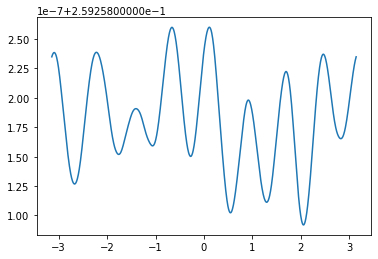

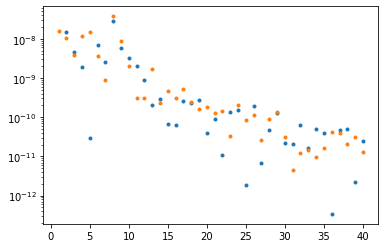

In [81]:
refined_z = np.linspace(-L/2, L/2,1000)
eta_sol = np.zeros_like(refined_z) + A
for j,n_value in enumerate(n):
    eta_sol += a_sol[j]*np.cos(n_value*2*np.pi/L*refined_z) + b_sol[j]*np.sin(n_value*2*np.pi/L*refined_z)
plt.plot(refined_z, eta_sol)
print(np.trapz(eta_sol, refined_z)/L)
print(L*(1-alpha)**3)
print(K)
print(c)
plt.show()
plt.semilogy(n, abs(a_sol), '.')
plt.semilogy(n, abs(b_sol), '.')